## To-do

- Building a data pipeline
- Preprocessing images for DL
- ​​Creating a deep NN Classifier
- Evaluating model performance
- Saving the model for deployment

## Setup

### 1.1 Install dependencies

For this project we are going to work with:
- TensorFlow
- OpenCV
- Matplotlib

In [7]:
!pip install tensorflow opencv-python matplotlib

We verify that the dependencies have been installed correctly

In [10]:
pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.2
anaconda-project                  0.11.1
anyio              

## 1.2 Importing dependencies

- **Tensorflow**: Open source library used for machine learning and deep learning tasks.
- **os**: Provides a way to interact with the operating system.

In [16]:
import tensorflow as tf
import os

List available physical processors: `gpus = tf.config.experimental.list_physical_devices('CPU')`

List available physical GPUs: `gpus = tf.config.experimental.list_physical_devices('GPU')`

In [85]:
# Avoid OMM errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Removing dodgy images

Remove all images that may not be read by python

In [20]:
import cv2
import imghdr

In [22]:
data_dir = 'data'

In [24]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [28]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    
    # Skip if it's not a directory
    if not os.path.isdir(class_path):
        print(f'Skipping non-directory: {class_path}')
        continue
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image: {image_path} | Error: {e}')
            os.remove(image_path)

Skipping non-directory: data/.DS_Store


## Loading data

In [31]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 301 files belonging to 2 classes.


In [35]:
data_iterator = data.as_numpy_iterator()

In [37]:
batch = data_iterator.next()

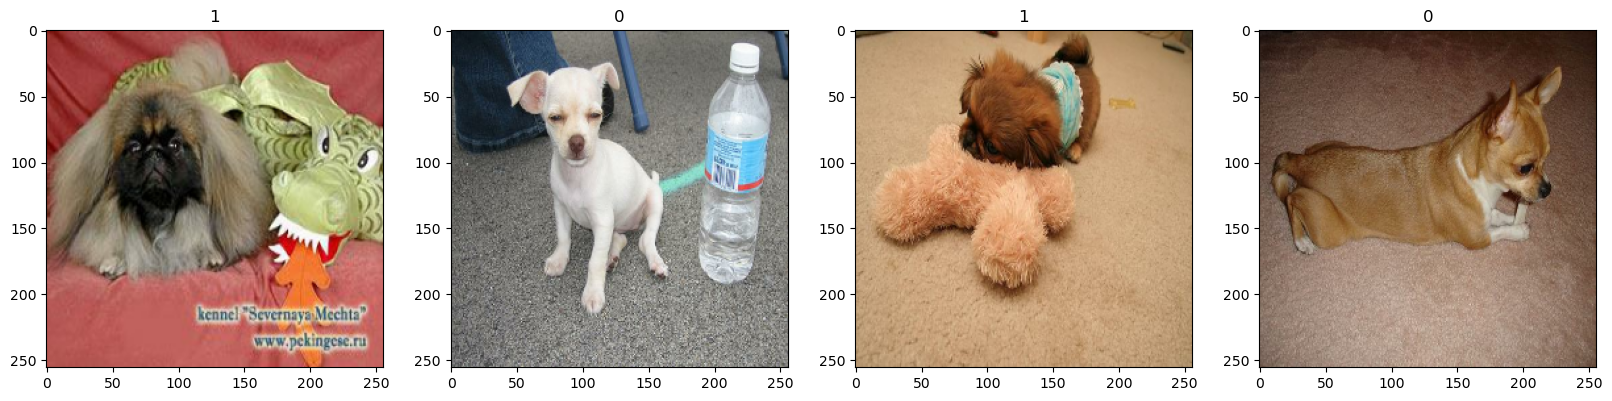

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling data

In [42]:
data = data.map(lambda x,y: (x/255, y))

In [44]:
data.as_numpy_iterator().next()

(array([[[[0.21344976, 0.08795956, 0.00560662],
          [0.23998928, 0.11449908, 0.03214614],
          [0.2320857 , 0.10659551, 0.02424257],
          ...,
          [0.46314254, 0.33947527, 0.24836773],
          [0.60482705, 0.48115978, 0.39005223],
          [0.46983948, 0.34530348, 0.2546303 ]],
 
         [[0.21488103, 0.08939084, 0.00703789],
          [0.23306987, 0.10757967, 0.02522673],
          [0.22941685, 0.10392665, 0.02157371],
          ...,
          [0.54227227, 0.43765622, 0.33975747],
          [0.54796576, 0.4357875 , 0.34166983],
          [0.553365  , 0.43744895, 0.34389707]],
 
         [[0.23014282, 0.10274544, 0.02102823],
          [0.23783702, 0.11043964, 0.02872243],
          [0.237688  , 0.11029065, 0.02857343],
          ...,
          [0.6284192 , 0.55035377, 0.44359234],
          [0.5089563 , 0.40908647, 0.31013834],
          [0.46549305, 0.36106598, 0.2642599 ]],
 
         ...,
 
         [[0.4974418 , 0.31312805, 0.1092065 ],
          [0.48663

## Split Data

In [47]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [49]:
train_size

7

In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [54]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [58]:
model = Sequential()

In [60]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [62]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [67]:
logdir='logs'

In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.4702 - loss: 1.1114 - val_accuracy: 0.5156 - val_loss: 0.6838
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.5092 - loss: 0.6881 - val_accuracy: 0.5938 - val_loss: 0.6891
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.6222 - loss: 0.6828 - val_accuracy: 0.6250 - val_loss: 0.6619
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.5757 - loss: 0.6707 - val_accuracy: 0.8125 - val_loss: 0.6384
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.6891 - loss: 0.6436 - val_accuracy: 0.7344 - val_loss: 0.5921
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.6314 - loss: 0.6105 - val_accuracy: 0.7188 - val_loss: 0.5692
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.6969 - loss: 0.5432 - val_accuracy: 0.6719 - val_loss: 0.5730
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.7372 - loss: 0.5553 - val_accuracy: 0.7500 - val_loss:

## Plot Performance

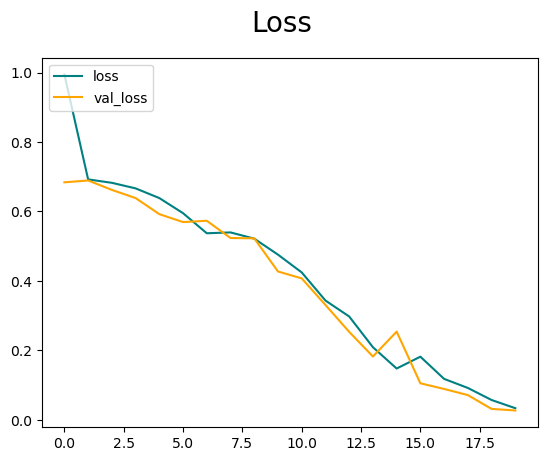

In [74]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

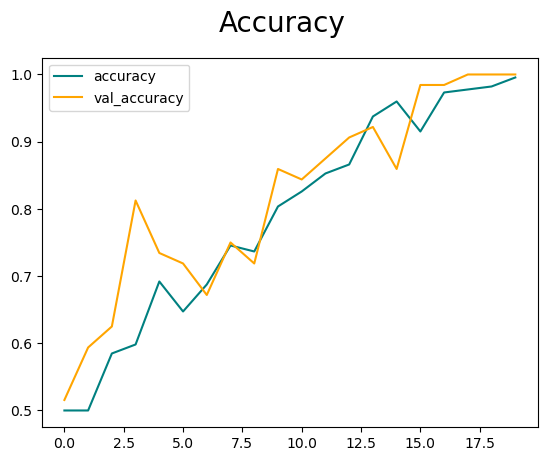

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [79]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [81]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [93]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


2024-09-13 13:36:46.271094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [95]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test

In [98]:
import cv2

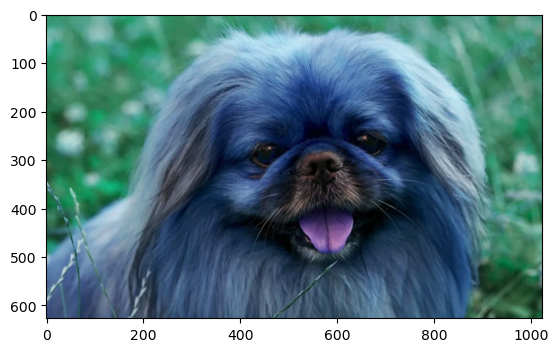

In [110]:
img = cv2.imread('prueba2.jpg')
plt.imshow(img)
plt.show()

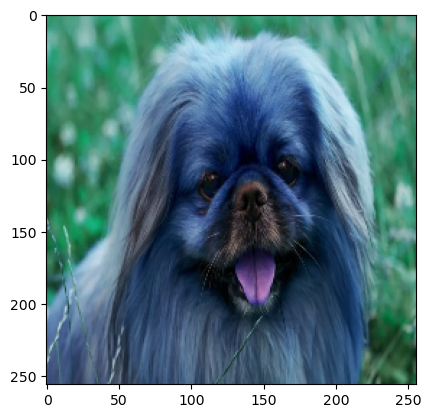

In [112]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [114]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [116]:
yhat

array([[0.84664655]], dtype=float32)

In [118]:
if yhat > 0.5: 
    print(f'pekinese')
else:
    print(f'chihuahua')

pekinese


## Save the model

In [122]:
from tensorflow.keras.models import load_model

In [128]:
model.save(os.path.join('models', 'imageclassifier.keras'))


In [134]:
new_model = load_model('models/imageclassifier.keras')


/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [138]:
import os

# Listar los archivos en el directorio models
print(os.listdir('models'))


['imageclassifier.h5', 'imageclassifier.keras']


In [140]:
# Guardar el modelo en formato Keras
model.save(os.path.join('models', 'imageclassifier.keras'))
